In [2]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Injesting The Data

In [4]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/benz/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/benz/test.csv')

Data Analysis

In [5]:
train_data.shape

(4209, 378)

In [6]:
test_data.shape

(4209, 377)

In [7]:
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


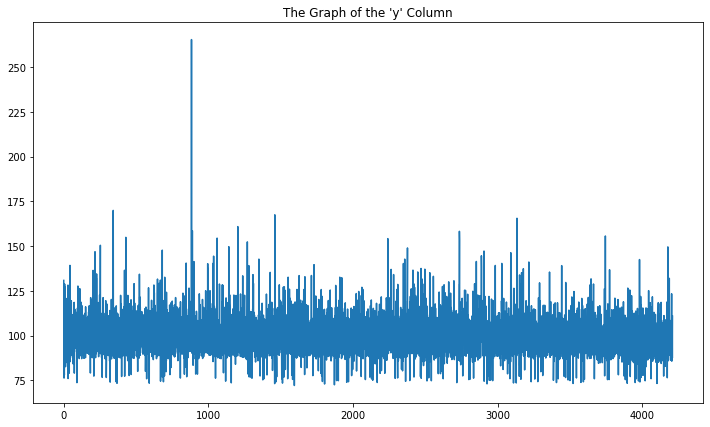

In [81]:
train_data['y'].plot(figsize=(12,7), title="The Graph of the 'y' Column");

In [8]:
test_data.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [9]:
train_data.dtypes

ID        int64
y       float64
X0       object
X1       object
X2       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: object

In [10]:
train_data.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
test_data.dtypes

ID       int64
X0      object
X1      object
X2      object
X3      object
         ...  
X380     int64
X382     int64
X383     int64
X384     int64
X385     int64
Length: 377, dtype: object

In [12]:
test_data.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Checking Null Values

In [14]:
train_data.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [15]:
test_data.isnull().sum()

ID      0
X0      0
X1      0
X2      0
X3      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 377, dtype: int64

In [16]:
train_data.describe(include='object')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,w,g,j
freq,360,833,1659,1942,4205,231,1042,277


Separating categorical and numeric feature


In [18]:
dictionary={}
dictionary['num'] = train_data.dtypes[train_data.dtypes=='int64'].index
dictionary['cat'] = train_data.dtypes[train_data.dtypes=='object'].index
dictionary

{'cat': Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object'),
 'num': Index(['ID', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
        ...
        'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
        'X385'],
       dtype='object', length=369)}

In [19]:
train_data['X376'].value_counts()

0    3968
1     241
Name: X376, dtype: int64

Finding and removing features with zero variance

In [20]:
da=[]
count=0
for i in dictionary['num']:
  if(np.var(train_data[i])==0):
    da.append(i)
print(da)

['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


In [21]:
z=['ID','y']
da.extend(z)
print(da)

['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347', 'ID', 'y']


In [26]:
y_train=train_data['y'].values
ID_train=train_data['ID'].values
ID_test=test_data['ID'].values

In [29]:
da_test=['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347', 'ID']

In [30]:
X_train=train_data.drop(da,axis=1)
X_test=test_data.drop(da_test,axis=1)

In [31]:
X_train.shape

(4209, 364)

In [32]:
X_test.shape

(4209, 364)

Applying Label encoding on the categorical variables

In [35]:
from sklearn.preprocessing import LabelEncoder

In [39]:
#Train dataset
le0=LabelEncoder()
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()
le5=LabelEncoder()
le6=LabelEncoder()
le8=LabelEncoder()

In [40]:
le0.fit(X_train['X0'])
le1.fit(X_train['X1'])
le2.fit(X_train['X2'])
le3.fit(X_train['X3'])
le4.fit(X_train['X4'])
le5.fit(X_train['X5'])
le6.fit(X_train['X6'])
le8.fit(X_train['X8'])

LabelEncoder()

In [41]:
#Test Dataset
let0=LabelEncoder()
let1=LabelEncoder()
let2=LabelEncoder()
let3=LabelEncoder()
let4=LabelEncoder()
let5=LabelEncoder()
let6=LabelEncoder()
let8=LabelEncoder()

In [42]:
#Test Dataset
let0.fit(X_test['X0'])
let1.fit(X_test['X1'])
let2.fit(X_test['X2'])
let3.fit(X_test['X3'])
let4.fit(X_test['X4'])
let5.fit(X_test['X5'])
let6.fit(X_test['X6'])
let8.fit(X_test['X8'])

LabelEncoder()

Transforming and replacing the categorical variables into 0s and 1s

In [43]:
#Train dataset
X_train['X0'] = le0.transform(X_train['X0'])
X_train['X1'] = le1.transform(X_train['X1'])
X_train['X2'] = le2.transform(X_train['X2'])
X_train['X3'] = le3.transform(X_train['X3'])
X_train['X4'] = le4.transform(X_train['X4'])
X_train['X5'] = le5.transform(X_train['X5'])
X_train['X6'] = le6.transform(X_train['X6'])
X_train['X8'] = le8.transform(X_train['X8'])

In [44]:
#Test dataset
X_test['X0'] = let0.transform(X_test['X0'])
X_test['X1'] = let1.transform(X_test['X1'])
X_test['X2'] = let2.transform(X_test['X2'])
X_test['X3'] = let3.transform(X_test['X3'])
X_test['X4'] = let4.transform(X_test['X4'])
X_test['X5'] = let5.transform(X_test['X5'])
X_test['X6'] = let6.transform(X_test['X6'])
X_test['X8'] = let8.transform(X_test['X8'])

In [45]:
X_train.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
X_test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


Perform dimensionality reduction on Train dataset

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.7)
pca.fit(X_train)

PCA(n_components=0.7)

In [48]:
pca.explained_variance_ratio_

array([0.38334782, 0.21388033, 0.13261866])

In [49]:
X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

In [50]:
X_train_transformed.shape, X_test_transformed.shape

((4209, 3), (4209, 3))

In [51]:
pca.inverse_transform(X_train_transformed).shape

(4209, 364)

Split the datasets

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_transformed,y_train , random_state = 2)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3156, 3)
(1053, 3)
(3156,)
(1053,)


Evaluate with ensemble learning algorithms

In [74]:
import xgboost
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [71]:
#Using XGBoost - The most powerful ensemble learning algorithm
start = time.time()
xgbr = xgboost.XGBRegressor()
xgbr.fit(X_train, y_train)

y_pred= xgbr.predict(X_test)
score = mean_squared_error(y_pred, y_test)
print('Score : ', score)
end = time.time()

print('\nRunTime : ', end - start)

[01:43:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Score :  110.00614368130348

RunTime :  0.1409289836883545


In [75]:
#Using GradientBoost 
start = time.time()
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

y_pred= gbr.predict(X_test)
score = mean_squared_error(y_pred, y_test)
print('Score : ', score)
end = time.time()

print('\nRunTime : ', end - start)

Score :  111.5884020483935

RunTime :  0.3684074878692627


As seen above, XGBoost performs more efficiently than GradientBoost